Popovics concrete model
Part I - Compression    
 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

sp.init_printing()


In [17]:
# Material parameters

fc = - 8e6
ec = -2e-3
ecu = -6e-3

n = 3

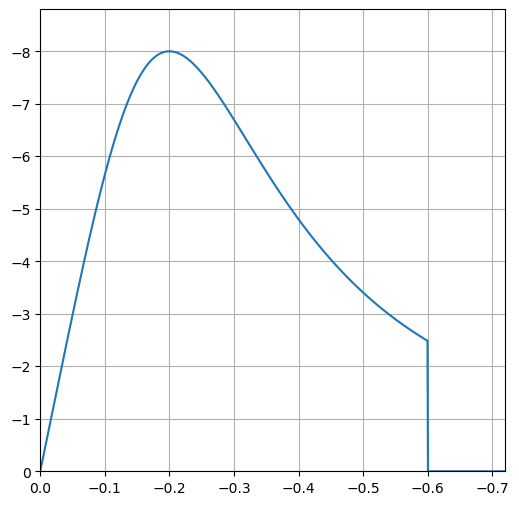

In [18]:
# Stress-strain
eps = np.linspace(0, 1.2 * ecu, 1000)
sig = np.zeros(1000)
for i, e in enumerate(eps):
    if e > ecu:
        sig[i] = (fc * e / ec) * (n / (n - 1 + (e / ec) ** n))

plt.figure(None, figsize=(6, 6))
plt.plot(eps * 100, sig / 1e6)
plt.xlim((0, 1.2 * ecu * 100))
plt.ylim((0, 1.1 * fc / 1e6))
plt.grid(True)

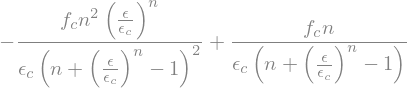

In [19]:
# Derivation of tangent modulus

e = sp.symbols('epsilon', real=True)
fc, ec, ecu = sp.symbols('f_c  epsilon_c epsilon_cu', real=True, constant=True)
n = sp.symbols('n', positive=True, real=True, constant=True)
s = (fc * e / ec) * (n / (n - 1 + (e / ec) ** n))
ds_de = sp.diff(s, e)
ds_de



In [20]:
# Area under the curve
expr = (fc * e / ec) * (n / (n - 1 + (e / ec) ** n))
fu = sp.symbols('f_u', positive=True, real=True)

solution = sp.solve(expr - fu, n)
solution


NotImplementedError: multiple generators [n, (epsilon/epsilon_c)**n]
No algorithms are implemented to solve equation epsilon*f_c*n/(epsilon_c*(n + (epsilon/epsilon_c)**n - 1)) - f_u

In [21]:
Ec, g = sp.symbols('E_c, g', positive=True, real=True)
expr = integral + fc ** 2 / Ec - g
sol = sp.solve(expr, ecu)
sol

In [22]:
# Part II - Tension

ft = 2e6
et = 1e-4
etu = 2 * et
b = .5

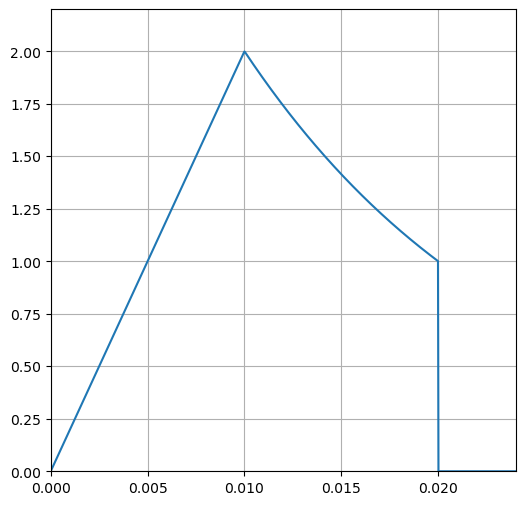

In [ ]:
eps = np.linspace(0, 1.2 * etu, 1000)
sig = np.zeros(1000)

for i, e in enumerate(eps):
    if e < et:
        sig[i] = (ft / et) * e
    elif e < etu:
        sig[i] = ft * b ** ((e - et) / (etu - et))

plt.figure(None, figsize=(6, 6))
plt.plot(eps * 100, sig / 1e6)
plt.xlim((0, 1.2 * etu * 100))
plt.ylim((0, 1.1 * ft / 1e6))
plt.grid(True)

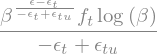

In [23]:
# Derivation of tangent modulus

ft, et, b, etu, e = sp.symbols('f_t epsilon_t beta epsilon_tu epsilon')

s = ft * b ** ((e - et) / (etu - et))
ds_de = sp.diff(s, e)
ds_de

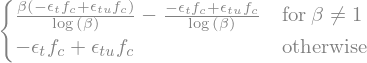

In [ ]:
x = sp.symbols('x')

ft, b, et, etu = sp.symbols('f_c beta epsilon_t epsilon_tu', positive=True)
expr = ft * b ** ((e - et) / (etu - et))

integral = sp.integrate(expr, (e, et, etu))
#integral

solution 